<div>
<a href="https://github.com/groupmm/edu_novfct"><img src="data/Edu_NovFct_Teaser.png" width=100% style="float: right;" alt="ENF Teaser"></a>
</div>

<div>
<h2>Figure 6<br> <small>Illustration of peak picking based on different heuristics. </small></h2> </div>

This notebook provides code for reproducing the subfigures of Figure 6 of the paper.
- Figure 6a: Novelty function.
- Figure 6b: Simple peak picking.
- Figure 6c: Usage of a global threshold.
- Figure 6d: Compressed magnitude spectrogram.
- Figure 6e: Usage of an additional distance constraint.
- Figure 6f: Application of Gaussian smoothing, max normalization, and a local threshold.

### Figure 6a
In the following code cell, we do the following:
* Import all necessary libraries and functions used in the notebook.
* Set the configurations for the figures.
* Load the audio waveform, compute the corresponding novelty function using libfmp, and visualize it.


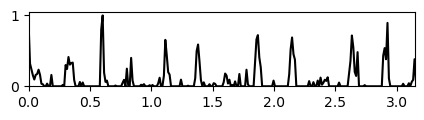

In [7]:
import numpy as np
import os, librosa
from scipy import signal
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter1d

import libfmp.b
import libfmp.c6

%matplotlib inline

### load audio wav 
fn_wav = os.path.join('./data/example_Shostakovich_audio.wav')
Fs = 22050
x, Fs = librosa.load(fn_wav, Fs)
x_duration = len(x)/Fs

### Settings of the figures
export = True # True: export the .png files to ./export folder
figsize_nov =(4.35,1.3)
dpi = 100
#### x-axis and y-axis
plot_sec = 3.15 # Corresponds to the first four measures
plot_xlim = [0, plot_sec]
plot_ylim_wav = [-1.05, 1.05]
plot_ylim = [0, 1.05]

### Figure06a
### Generate an novelty function using x
N, H = 1024, 256
gamma = 10
nov, Fs_nov = libfmp.c6.compute_novelty_spectrum(x, Fs=Fs, N=N, H=H, gamma=gamma)
fig, ax, line = libfmp.b.plot_signal(nov, Fs_nov, figsize=figsize_nov, color='k', title='', xlabel='', dpi = dpi);
ax.set_xlim(plot_xlim)
ax.set_ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure06a.png')
if export==True:
    plt.savefig(output_path)

### Figure 6b

Simple peak picking (selected peak positions are indicated by red vertical lines). 

In the following code cell, we do the following:
* Define one ploting function for the following cells. 
* Apply simple peak picking to the novelty function and visualize the selected peaks.


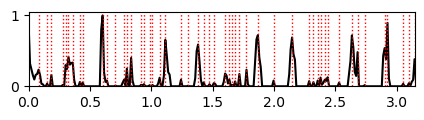

In [8]:
### Figure06b
### Simple peak picking without specific settings (e.g., threshold, distance...)
def plot_function_peak_positions(nov, Fs_nov, peaks, title='', figsize=(8,2), dpi=200):
    peaks_sec = peaks/Fs_nov
    fig, ax, line = libfmp.b.plot_signal(nov, Fs_nov, figsize=figsize_nov, color='k', title=title, xlabel='', dpi=dpi);
    plt.vlines(peaks_sec, 0, 1.1, color='r', linestyle=':', linewidth=1);
    
peaks = signal.find_peaks(nov)[0]

plot_function_peak_positions(nov, Fs_nov, peaks, figsize=figsize_nov, dpi = dpi)
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure06b.png')
if export==True:
    plt.savefig(output_path)

### Figure 6c

Usage of a global threshold.

In the following code cell, we apply global threshold to the peak picker and viualize the selected peaks.

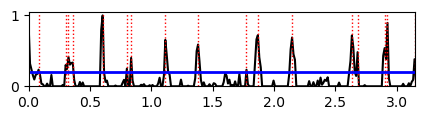

In [9]:
### Figure06c
### Simple peak picking with a global threshold
threshold = 0.2
peaks = signal.find_peaks(nov, height=threshold)[0]

plot_function_peak_positions(nov, Fs_nov, peaks, figsize=figsize_nov, dpi = dpi)
plt.hlines(threshold, 0, x_duration, color='blue', linewidth=2);
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure06c.png')
if export==True:
    plt.savefig(output_path)


### Figure 6d

Usage of a local threshold.

In the following code cell, we apply a local threshold to the peak picker and viualize the selected peaks.

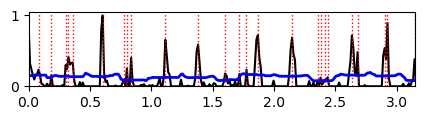

In [10]:
### Figure06d
### Simple peak picking with local average-based threhold
M=12 
height =  libfmp.c6.compute_local_average(nov, M) + 0.05
peaks = signal.find_peaks(nov, height=height)[0]

plot_function_peak_positions(nov, Fs_nov, peaks, title='', figsize=figsize_nov, dpi = dpi)
t = np.arange(nov.shape[0]) / Fs_nov 
plt.plot(t, height, color='blue', linewidth=2);
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)

plt.tight_layout()
output_path = os.path.join('./export/Figure06d.png')
if export==True:
    plt.savefig(output_path)

### Figure 6e

Usage of an additional distance constraint.

In the following code cell, we apply peak picking with an additional distance contraint, and visualize the selected peaks.

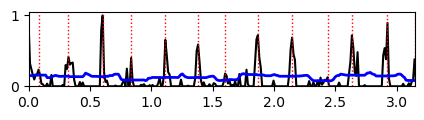

In [11]:
### Figure06e
### Peak picking with an additional distance constraint
distance = 12
peaks = signal.find_peaks(nov, distance=distance,  height=height)[0]

plot_function_peak_positions(nov, Fs_nov, peaks, title='', figsize=figsize_nov, dpi = dpi)
t = np.arange(nov.shape[0]) / Fs_nov 
plt.plot(t, height, color='blue', linewidth=2);
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)

plt.tight_layout()
output_path = os.path.join('./export/Figure06e.png')
if export==True:
    plt.savefig(output_path)

### Figure 6f

Application of Gaussian smoothing, max normalization, and a local threshold.

In the following code cell, we do the following:
* Apply Gaussian smoothing.
* Apply max-normalization.
* Calculate a local threshold.
* Apply peak peaking with the local threhold.
* Visualize the selected peaks.

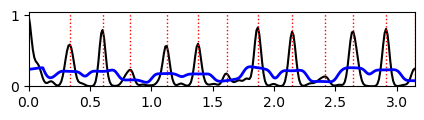

In [12]:
### Figure06f
### Combining peak picking with Gaussian smoothing, max normalization, and a local threshold.
sigma=2
nov_smooth = gaussian_filter1d(nov, sigma=sigma)
nov_smooth = nov_smooth/np.max(nov_smooth)

M=10
height =  libfmp.c6.compute_local_average(nov_smooth, M)
peaks = signal.find_peaks(nov_smooth, height=height)[0]

plot_function_peak_positions(nov_smooth, Fs_nov, peaks, figsize=figsize_nov, dpi = dpi)
t = np.arange(nov.shape[0]) / Fs_nov 
plt.plot(t, height, color='blue', linewidth=2);
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure06f.png')
if export==True:
    plt.savefig(output_path)

### Further Notes and Links
<ul>
<li><span style="color:black">
Meinard Müller and Ching-Yu Chiu: <a href="https://ieeexplore.ieee.org/document/6353546"><strong>A Basic Tutorial on Novelty and Activation Functions for Music Signal Processing.</strong></a> Transaction of the International Society for Music Information Retrieval (TISMIR), ??: ??–??, 2024. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="./data/bibtex_MuellerC24_EduNovFct_TISMIR.txt"> Bibtex </a>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="https://github.com/groupmm/edu_novfct">GitHub</a></span></li>
</ul> 

* In the [FMP notebook on peak picking](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C6/C6S1_PeakPicking.html), one finds a detailed introduction to different peak picking strategies.

<div>
<a href="https://opensource.org/licenses/MIT"><img src="data/Edu_NovFct_License.png" width=100% style="float: right;" alt="ENF License"></a>
</div>